In [1]:
from Almanac.Data import get_weather_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

%matplotlib inline

In [2]:
df = get_weather_data("Chicago, IL, 60601, US", "2015-01-01", "2022-12-31")

<Axes: xlabel='time'>

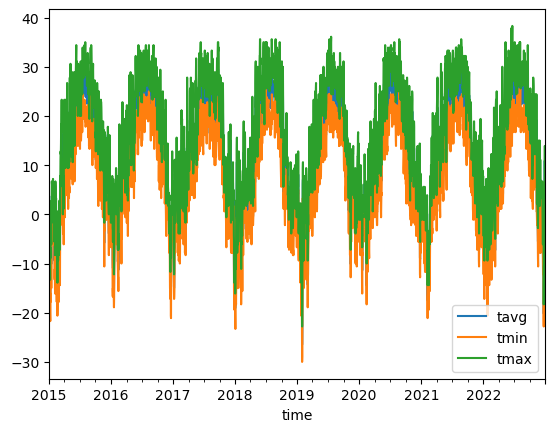

In [3]:
df.plot(y=["tavg", "tmin", "tmax"])

In [4]:
df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2015-01-01,-4.3,-8.3,0.0,0.0,0.0,240.0,25.5,NaN,1019.8,NaN
2015-01-02,-1.5,-6.7,2.2,0.0,0.0,NaN,7.8,NaN,1025.3,NaN
2015-01-03,1.6,-0.6,2.8,15.0,0.0,NaN,8.5,NaN,1013.7,NaN
2015-01-04,-3.7,-15.0,2.2,4.6,51.0,305.0,20.2,NaN,NaN,NaN
2015-01-05,-15.6,-18.3,-12.2,3.8,102.0,NaN,17.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,-8.1,-13.3,-3.3,0.0,25.0,210.0,19.8,NaN,1021.5,NaN
2022-12-28,2.7,-3.9,7.2,0.0,0.0,195.0,26.9,NaN,1010.6,NaN
2022-12-29,10.9,6.7,13.9,0.0,0.0,197.0,26.5,NaN,1010.4,NaN


In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
r = seasonal_decompose(df["tmin"], period=int(365 / 4), model="add")

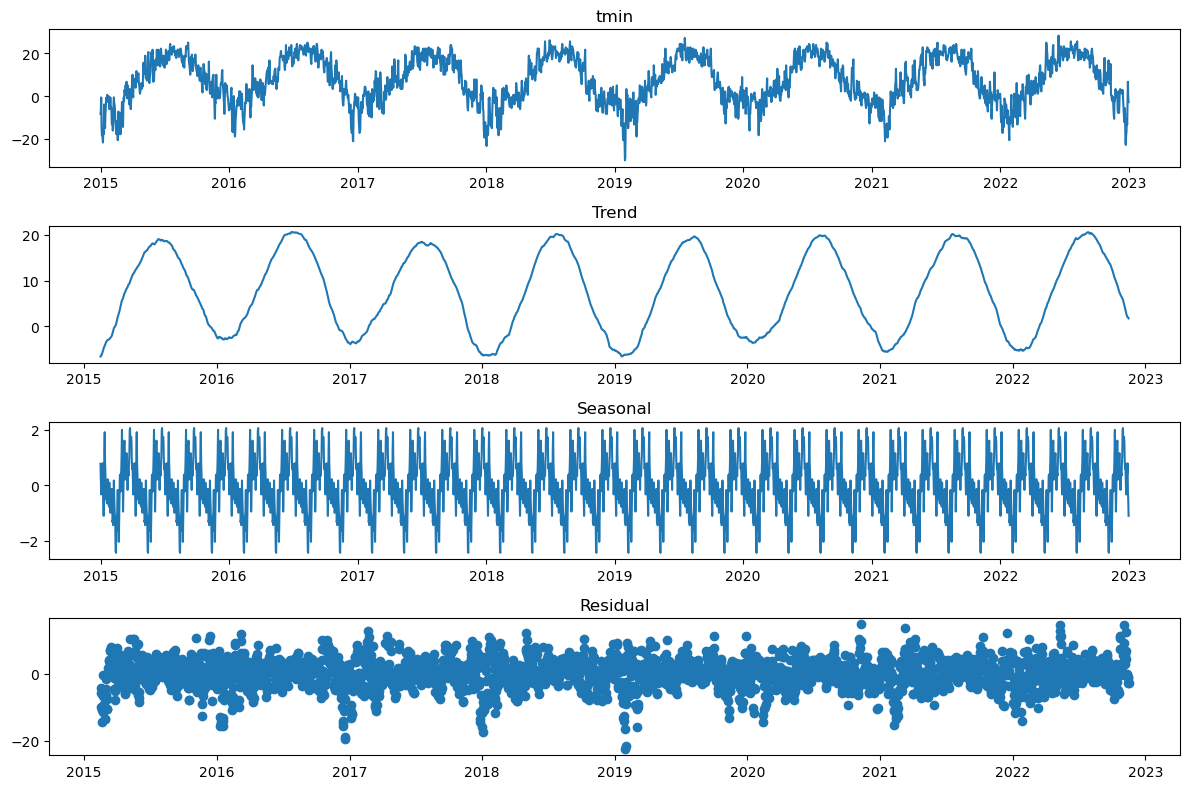

In [7]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 8))
ax[0].plot(df["tmin"])
ax[1].plot(r.trend)
ax[2].plot(r.seasonal)
ax[3].scatter(x=r.resid.index, y=r.resid)

ax[0].set_title("tmin")
ax[1].set_title("Trend")
ax[2].set_title("Seasonal")
ax[3].set_title("Residual")

fig.tight_layout()

In [8]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [9]:
cyc, trend = hpfilter(df["tmin"], lamb=13322500)

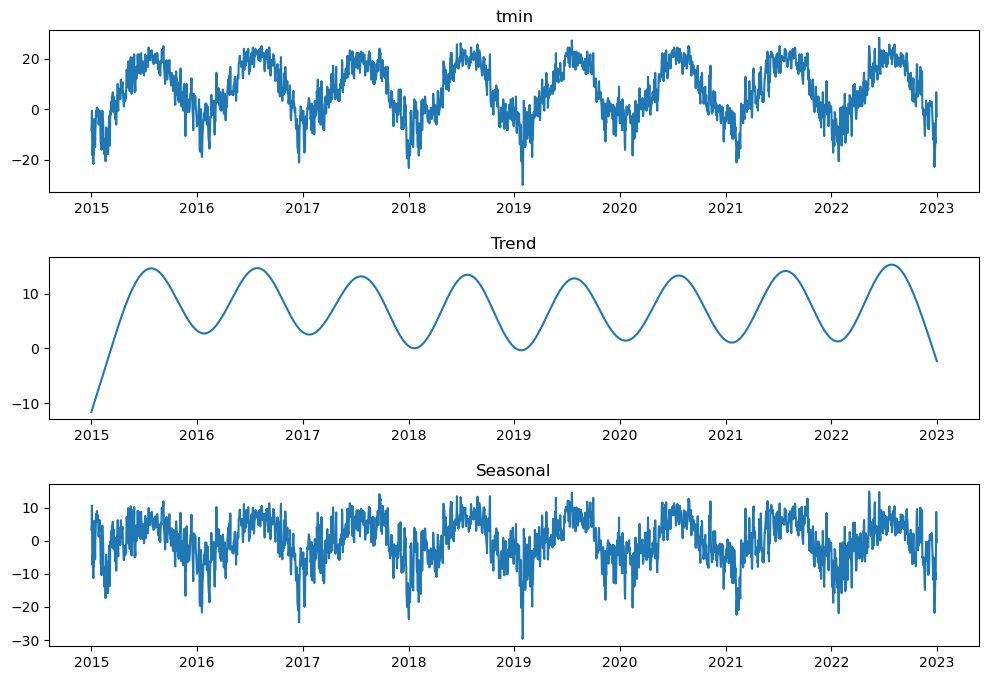

In [10]:
fig2, ax2 = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
ax2[0].plot(df["tmin"])
ax2[1].plot(trend)
ax2[2].plot(cyc)

ax2[0].set_title("tmin")
ax2[1].set_title("Trend")
ax2[2].set_title("Seasonal")

plt.subplots_adjust(hspace=0.4)

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [12]:
df["TEFit_tmin"] = (
    ExponentialSmoothing(
        df["tmin"], trend="add", seasonal="add", seasonal_periods=365
    )
    .fit()
    .fittedvalues
)

<Axes: xlabel='time'>

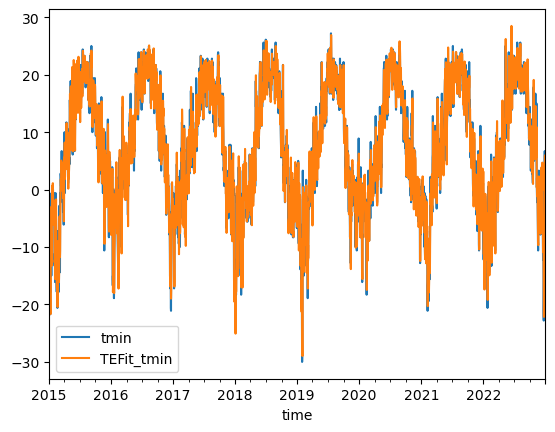

In [13]:
df.plot(y=["tmin", "TEFit_tmin"])

In [14]:
fitted_model = ExponentialSmoothing(
    df["tmin"].loc[:"2022-01-01"],
    trend="add",
    seasonal="add",
    seasonal_periods=365,
).fit()

In [15]:
pred = fitted_model.forecast(365)

<Axes: xlabel='time'>

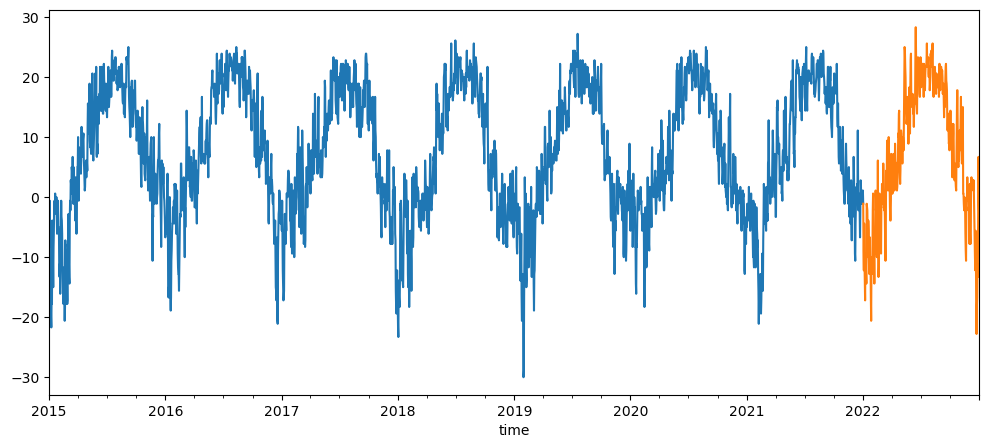

In [16]:
df["tmin"].loc[:"2022-01-01"].plot(figsize=(12, 5), label="TRAIN")
df["tmin"].loc["2022-01-01":].plot(label="TEST")

<Axes: xlabel='time'>

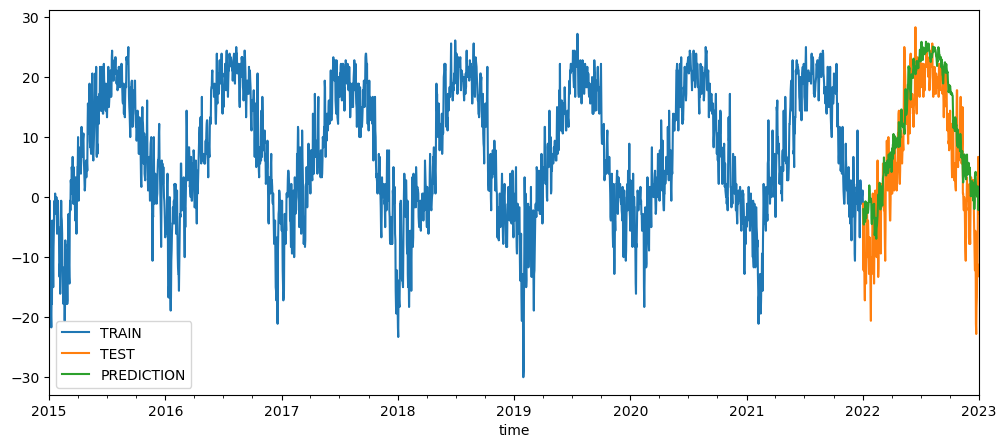

In [17]:
df["tmin"].loc[:"2022-01-01"].plot(figsize=(12, 5), label="TRAIN", legend=True)
df["tmin"].loc["2022-01-01":].plot(label="TEST", legend=True)
pred.plot(label="PREDICTION", legend=True)
# fitted_model.fittedvalues.plot()

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
# np.sqrt(mean_squared_error(df['tmin'].loc['2022-01-01':][1:],pred))

In [20]:
df["tmin"].describe()

count    2922.000000
mean        7.330698
std        10.745377
min       -30.000000
25%        -0.600000
50%         7.200000
75%        17.200000
max        28.300000
Name: tmin, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2015-01-01 to 2022-12-31
Freq: D
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tavg        2922 non-null   float64
 1   tmin        2922 non-null   float64
 2   tmax        2922 non-null   float64
 3   prcp        2922 non-null   float64
 4   snow        2922 non-null   float64
 5   wdir        2636 non-null   float64
 6   wspd        2922 non-null   float64
 7   wpgt        0 non-null      float64
 8   pres        2841 non-null   float64
 9   tsun        0 non-null      float64
 10  TEFit_tmin  2922 non-null   float64
dtypes: float64(11)
memory usage: 338.5 KB


In [22]:
df_train = get_weather_data("Chicago, IL", "2015-01-01", "2022-12-31")
df_test = get_weather_data("Chicago, IL", "2023-01-01")

In [23]:
fitted_model = ExponentialSmoothing(
    df_train["tmin"].resample("W").min(),
    trend="add",
    seasonal="add",
    seasonal_periods=52,
).fit()

In [24]:
predicted = fitted_model.forecast(52)

In [25]:
df_test["tmin"].resample("W").min()[1:45]

time
2023-01-08    -3.9
2023-01-15    -4.4
2023-01-22    -2.2
2023-01-29   -10.0
2023-02-05   -17.2
2023-02-12    -5.0
2023-02-19    -7.2
2023-02-26    -7.8
2023-03-05    -2.2
2023-03-12    -1.1
2023-03-19   -10.6
2023-03-26    -2.2
2023-04-02    -2.8
2023-04-09     0.6
2023-04-16     1.7
2023-04-23     0.0
2023-04-30     1.1
2023-05-07     5.0
2023-05-14     9.4
2023-05-21     8.3
2023-05-28     8.9
2023-06-04    12.8
2023-06-11    11.7
2023-06-18    11.1
2023-06-25    16.7
2023-07-02    15.0
2023-07-09    15.6
2023-07-16    17.2
2023-07-23    16.7
2023-07-30    19.4
2023-08-06    17.8
2023-08-13    17.8
2023-08-20    14.4
2023-08-27    18.3
2023-09-03    12.2
2023-09-10    12.8
2023-09-17    10.6
2023-09-24    11.7
2023-10-01    13.9
2023-10-08     7.2
2023-10-15     4.4
2023-10-22     4.4
2023-10-29     3.9
2023-11-05    -2.8
Freq: W-SUN, Name: tmin, dtype: float64

In [26]:
predicted[0:44]

2023-01-08   -11.537374
2023-01-15   -10.849849
2023-01-22    -8.974839
2023-01-29   -13.837255
2023-02-05   -14.674778
2023-02-12   -13.149808
2023-02-19    -9.812296
2023-02-26    -8.612213
2023-03-05    -5.374654
2023-03-12    -3.412150
2023-03-19    -2.187167
2023-03-26    -1.474643
2023-04-02    -1.749625
2023-04-09     2.412894
2023-04-16     1.162864
2023-04-23     2.412886
2023-04-30     4.625398
2023-05-07     4.562901
2023-05-14     6.725413
2023-05-21    10.400435
2023-05-28    10.537888
2023-06-04    12.487969
2023-06-11    15.200455
2023-06-18    14.487964
2023-06-25    15.387972
2023-07-02    17.200493
2023-07-09    17.137991
2023-07-16    18.725505
2023-07-23    18.525516
2023-07-30    17.063026
2023-08-06    17.975526
2023-08-13    17.200529
2023-08-20    15.538063
2023-08-27    16.450569
2023-09-03    13.800580
2023-09-10    14.138062
2023-09-17    14.000557
2023-09-24    10.463083
2023-10-01     9.500591
2023-10-08     5.325600
2023-10-15     3.463112
2023-10-22     2

In [27]:
mean_squared_error(
    df_test["tmin"].resample("W").min()[1:45], predicted[0:44], squared=False
)

3.2417866837305818

<Axes: xlabel='time'>

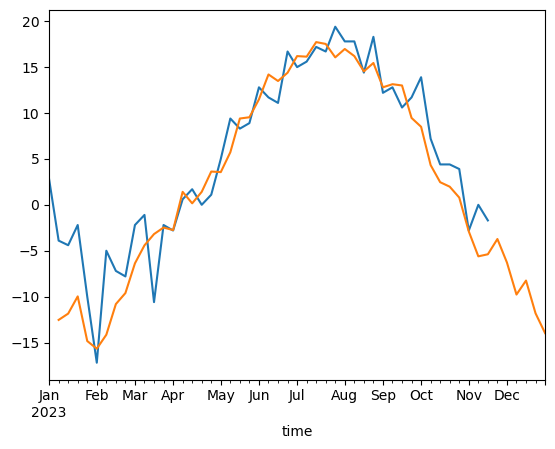

In [28]:
df_test["tmin"].resample("W").min().plot()
(predicted - 1).plot()

In [29]:
from Almanac.Data import get_frost_dates

In [30]:
get_frost_dates(df_test.resample("W").min())

([Timestamp('2023-11-05 00:00:00')], [Timestamp('2023-04-23 00:00:00')])

In [31]:
# mean_squared_error(df_test["tmin"].resample("W").min()[1:53],predicted-3,squared=False)

In [32]:
predicted - 3

2023-01-08   -14.537374
2023-01-15   -13.849849
2023-01-22   -11.974839
2023-01-29   -16.837255
2023-02-05   -17.674778
2023-02-12   -16.149808
2023-02-19   -12.812296
2023-02-26   -11.612213
2023-03-05    -8.374654
2023-03-12    -6.412150
2023-03-19    -5.187167
2023-03-26    -4.474643
2023-04-02    -4.749625
2023-04-09    -0.587106
2023-04-16    -1.837136
2023-04-23    -0.587114
2023-04-30     1.625398
2023-05-07     1.562901
2023-05-14     3.725413
2023-05-21     7.400435
2023-05-28     7.537888
2023-06-04     9.487969
2023-06-11    12.200455
2023-06-18    11.487964
2023-06-25    12.387972
2023-07-02    14.200493
2023-07-09    14.137991
2023-07-16    15.725505
2023-07-23    15.525516
2023-07-30    14.063026
2023-08-06    14.975526
2023-08-13    14.200529
2023-08-20    12.538063
2023-08-27    13.450569
2023-09-03    10.800580
2023-09-10    11.138062
2023-09-17    11.000557
2023-09-24     7.463083
2023-10-01     6.500591
2023-10-08     2.325600
2023-10-15     0.463112
2023-10-22    -0

In [33]:
df_test["tmin"].resample("W").min()

time
2023-01-01     2.8
2023-01-08    -3.9
2023-01-15    -4.4
2023-01-22    -2.2
2023-01-29   -10.0
2023-02-05   -17.2
2023-02-12    -5.0
2023-02-19    -7.2
2023-02-26    -7.8
2023-03-05    -2.2
2023-03-12    -1.1
2023-03-19   -10.6
2023-03-26    -2.2
2023-04-02    -2.8
2023-04-09     0.6
2023-04-16     1.7
2023-04-23     0.0
2023-04-30     1.1
2023-05-07     5.0
2023-05-14     9.4
2023-05-21     8.3
2023-05-28     8.9
2023-06-04    12.8
2023-06-11    11.7
2023-06-18    11.1
2023-06-25    16.7
2023-07-02    15.0
2023-07-09    15.6
2023-07-16    17.2
2023-07-23    16.7
2023-07-30    19.4
2023-08-06    17.8
2023-08-13    17.8
2023-08-20    14.4
2023-08-27    18.3
2023-09-03    12.2
2023-09-10    12.8
2023-09-17    10.6
2023-09-24    11.7
2023-10-01    13.9
2023-10-08     7.2
2023-10-15     4.4
2023-10-22     4.4
2023-10-29     3.9
2023-11-05    -2.8
2023-11-12     0.0
2023-11-19    -1.7
Freq: W-SUN, Name: tmin, dtype: float64

In [34]:
f = (
    ExponentialSmoothing(
        df_train["tmin"].resample("W").min(),
        trend="add",
        seasonal="add",
        seasonal_periods=52,
    )
    .fit()
    .fittedvalues
)

In [35]:
df_test["tmin"].resample("W").min()[1:11]

time
2023-01-08    -3.9
2023-01-15    -4.4
2023-01-22    -2.2
2023-01-29   -10.0
2023-02-05   -17.2
2023-02-12    -5.0
2023-02-19    -7.2
2023-02-26    -7.8
2023-03-05    -2.2
2023-03-12    -1.1
Freq: W-SUN, Name: tmin, dtype: float64

In [36]:
predicted[0:10]

2023-01-08   -11.537374
2023-01-15   -10.849849
2023-01-22    -8.974839
2023-01-29   -13.837255
2023-02-05   -14.674778
2023-02-12   -13.149808
2023-02-19    -9.812296
2023-02-26    -8.612213
2023-03-05    -5.374654
2023-03-12    -3.412150
Freq: W-SUN, dtype: float64

In [37]:
# ttt=[mean_squared_error(df_test["tmin"].resample("W").min()[1:53],predicted-x,squared=False) for x in np.arange(0,14,0.5)]

In [38]:
predicted - 3

2023-01-08   -14.537374
2023-01-15   -13.849849
2023-01-22   -11.974839
2023-01-29   -16.837255
2023-02-05   -17.674778
2023-02-12   -16.149808
2023-02-19   -12.812296
2023-02-26   -11.612213
2023-03-05    -8.374654
2023-03-12    -6.412150
2023-03-19    -5.187167
2023-03-26    -4.474643
2023-04-02    -4.749625
2023-04-09    -0.587106
2023-04-16    -1.837136
2023-04-23    -0.587114
2023-04-30     1.625398
2023-05-07     1.562901
2023-05-14     3.725413
2023-05-21     7.400435
2023-05-28     7.537888
2023-06-04     9.487969
2023-06-11    12.200455
2023-06-18    11.487964
2023-06-25    12.387972
2023-07-02    14.200493
2023-07-09    14.137991
2023-07-16    15.725505
2023-07-23    15.525516
2023-07-30    14.063026
2023-08-06    14.975526
2023-08-13    14.200529
2023-08-20    12.538063
2023-08-27    13.450569
2023-09-03    10.800580
2023-09-10    11.138062
2023-09-17    11.000557
2023-09-24     7.463083
2023-10-01     6.500591
2023-10-08     2.325600
2023-10-15     0.463112
2023-10-22    -0

In [39]:
df_test["tmin"].resample("W").min()[1:53]

time
2023-01-08    -3.9
2023-01-15    -4.4
2023-01-22    -2.2
2023-01-29   -10.0
2023-02-05   -17.2
2023-02-12    -5.0
2023-02-19    -7.2
2023-02-26    -7.8
2023-03-05    -2.2
2023-03-12    -1.1
2023-03-19   -10.6
2023-03-26    -2.2
2023-04-02    -2.8
2023-04-09     0.6
2023-04-16     1.7
2023-04-23     0.0
2023-04-30     1.1
2023-05-07     5.0
2023-05-14     9.4
2023-05-21     8.3
2023-05-28     8.9
2023-06-04    12.8
2023-06-11    11.7
2023-06-18    11.1
2023-06-25    16.7
2023-07-02    15.0
2023-07-09    15.6
2023-07-16    17.2
2023-07-23    16.7
2023-07-30    19.4
2023-08-06    17.8
2023-08-13    17.8
2023-08-20    14.4
2023-08-27    18.3
2023-09-03    12.2
2023-09-10    12.8
2023-09-17    10.6
2023-09-24    11.7
2023-10-01    13.9
2023-10-08     7.2
2023-10-15     4.4
2023-10-22     4.4
2023-10-29     3.9
2023-11-05    -2.8
2023-11-12     0.0
2023-11-19    -1.7
Freq: W-SUN, Name: tmin, dtype: float64

In [41]:
mean_squared_error(
    df_test["tmin"].resample("W").min()[1:11],
    predicted[0:10] - 3,
    squared=False,
)

7.626720268291954

In [42]:
test = np.arange(0, 14, 0.5)

In [43]:
test[6]

3.0

In [44]:
type(df["tmin"].resample("W").min().index.freq)

pandas._libs.tslibs.offsets.Week

In [45]:
def hw_weekly_frost_date_forecast(train, location=None):
    fitted_model = ExponentialSmoothing(
        train["tmin"].resample("W").min(),
        trend="add",
        seasonal="add",
        seasonal_periods=52,
    ).fit()
    predicted = fitted_model.forecast(52)

    if location is not None:
        # Create an array of offset values to test
        offset = np.arange(0, 14, 0.5)
        # Get weather data for 9 weeks after the training period
        df_future = get_weather_data(
            location,
            start=train.index[-1] + timedelta(weeks=1),
            end=train.index[-1] + timedelta(weeks=9),
        )
        # Calculate the RMSE between the new 9 week period and the prediction - offset
        os_test = [
            mean_squared_error(
                df_future["tmin"].resample("W").min(),
                predicted[df_future["tmin"].resample("W").min().index] - x,
                squared=False,
            )
            for x in offset
        ]

        os_ind = (
            pd.Series(os_test).diff()[pd.Series(os_test).diff() > 0].index[0]
        )
        # The "correct" offset is choosen as the first offset that causes the RMSE to stop decreasing and start increasing.
        # This should yield predictions with smaller RMSE than no offset and be less likely to be early in the prediction of
        # the last frost of spring.
        predicted = predicted - offset[os_ind]
        # return the prediction series and the offset that was used.
        return predicted, offset[os_ind]
    else:
        return predicted

In [46]:
pred, os = hw_weekly_frost_date_forecast(df_train, "Chicago, IL")

In [47]:
pred

2023-01-08   -12.037374
2023-01-15   -11.349849
2023-01-22    -9.474839
2023-01-29   -14.337255
2023-02-05   -15.174778
2023-02-12   -13.649808
2023-02-19   -10.312296
2023-02-26    -9.112213
2023-03-05    -5.874654
2023-03-12    -3.912150
2023-03-19    -2.687167
2023-03-26    -1.974643
2023-04-02    -2.249625
2023-04-09     1.912894
2023-04-16     0.662864
2023-04-23     1.912886
2023-04-30     4.125398
2023-05-07     4.062901
2023-05-14     6.225413
2023-05-21     9.900435
2023-05-28    10.037888
2023-06-04    11.987969
2023-06-11    14.700455
2023-06-18    13.987964
2023-06-25    14.887972
2023-07-02    16.700493
2023-07-09    16.637991
2023-07-16    18.225505
2023-07-23    18.025516
2023-07-30    16.563026
2023-08-06    17.475526
2023-08-13    16.700529
2023-08-20    15.038063
2023-08-27    15.950569
2023-09-03    13.300580
2023-09-10    13.638062
2023-09-17    13.500557
2023-09-24     9.963083
2023-10-01     9.000591
2023-10-08     4.825600
2023-10-15     2.963112
2023-10-22     2

In [48]:
df_test["tmin"].resample("W").min()

time
2023-01-01     2.8
2023-01-08    -3.9
2023-01-15    -4.4
2023-01-22    -2.2
2023-01-29   -10.0
2023-02-05   -17.2
2023-02-12    -5.0
2023-02-19    -7.2
2023-02-26    -7.8
2023-03-05    -2.2
2023-03-12    -1.1
2023-03-19   -10.6
2023-03-26    -2.2
2023-04-02    -2.8
2023-04-09     0.6
2023-04-16     1.7
2023-04-23     0.0
2023-04-30     1.1
2023-05-07     5.0
2023-05-14     9.4
2023-05-21     8.3
2023-05-28     8.9
2023-06-04    12.8
2023-06-11    11.7
2023-06-18    11.1
2023-06-25    16.7
2023-07-02    15.0
2023-07-09    15.6
2023-07-16    17.2
2023-07-23    16.7
2023-07-30    19.4
2023-08-06    17.8
2023-08-13    17.8
2023-08-20    14.4
2023-08-27    18.3
2023-09-03    12.2
2023-09-10    12.8
2023-09-17    10.6
2023-09-24    11.7
2023-10-01    13.9
2023-10-08     7.2
2023-10-15     4.4
2023-10-22     4.4
2023-10-29     3.9
2023-11-05    -2.8
2023-11-12     0.0
2023-11-19    -1.7
Freq: W-SUN, Name: tmin, dtype: float64

In [49]:
t1 = timedelta(weeks=9)

In [50]:
df["tmin"].resample("W").min().index[-1]

Timestamp('2023-01-01 00:00:00')

In [51]:
predicted[df["tmin"].resample("W").min().index[-1]]

KeyError: Timestamp('2023-01-01 00:00:00')

In [52]:
df_train.index[-1]

Timestamp('2022-12-31 00:00:00')

In [ ]:
df = get_weather_data("Chicago, IL, 60601, US", "2015-01-01", "2021-12-31")

In [ ]:
fitted_model = ExponentialSmoothing(
    df["tmin"].resample("W").min(),
    trend="add",
    seasonal="add",
    seasonal_periods=52,
).fit()
predicted = fitted_model.forecast(52)

In [ ]:
predicted - 3.5

In [ ]:
offset = np.arange(0, 4, 0.5)
# Get weather data for 9 weeks after the training period
df_future = get_weather_data(
    "Chicago, IL",
    start=df.index[-1] + timedelta(weeks=1),
    end=df.index[-1] + timedelta(weeks=9),
)

In [ ]:
os_test = [
    mean_squared_error(
        df_future["tmin"].resample("W").min(),
        predicted[df_future["tmin"].resample("W").min().index] - x,
        squared=False,
    )
    for x in offset
]

In [ ]:
os_test

In [ ]:
pd.Series(os_test).diff()[pd.Series(os_test).diff() > 0].empty